# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# first importing all the libraries that ill use
import pandas as pd
import json
import requests
from matplotlib import pyplot as plt
% matplotlib inline
import seaborn as sns

In [2]:
#loading the twitter archive csv
wrd_df= pd.read_csv("twitter-archive-enhanced.csv")
wrd_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(r.content)

335079

In [4]:
import requests
image_url = " https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
  
# URL of the image to be downloaded is defined as image_url
r = requests.get(image_url) # create HTTP response object
  
# send a HTTP request to the server and save
# the HTTP response in a response object called r
with open("image_predictions_tsv",'wb') as f:
  
    # Saving received content as a png file in
    # binary format
  
    # write the contents of the response (r.content)
    # to a new file in binary mode.
    f.write(r.content)

In [5]:
image_pred_df=pd.read_csv("image_predictions_tsv", sep="\t")
image_pred_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#function to load the twitter api file and put into a data frame
def wrangle(filename):
    #opening the compressed file
    tweets = []
    for line in open(filename, 'r'):
        tweets.append(json.loads(line))
       #turning dict to a data frame 
        df=pd.DataFrame(tweets)
    
    return df

In [7]:
df_tweets=wrangle("tweet-json.txt")
df_tweets.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Displaying all the tables;

In [8]:
#twitter enhanced csv
wrd_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
214,851464819735769094,NaN,NaN,2017-04-10 16:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Iggy. He was a rescue dog killed in th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851464819...,14,10,Iggy,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
31,886258384151887873,NaN,NaN,2017-07-15 16:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Waffles. His doggles are pupside down....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886258384...,13,10,Waffles,None,None,None,None
1894,674743008475090944,NaN,NaN,2015-12-10 00:10:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just saw a spider. 10/10 d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674743008...,10,10,Sophie,None,None,None,None
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,None,None,None,None


In [9]:
#tweets json.txt
df_tweets.sample(5)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
1795,None,None,Wed Dec 16 23:29:14 +0000 2015,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 677269275850219520, 'id_str'...",2164,False,This is the happiest pupper I've ever seen. 10...,None,...,False,NaN,NaN,NaN,790,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
150,None,None,Fri May 12 00:46:44 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 862831346963447808, 'id_str'...",20011,False,This is Zooey. She's the world's biggest fan o...,None,...,False,NaN,NaN,NaN,5457,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1284,None,None,Fri Mar 11 21:15:02 +0000 2016,"[0, 78]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,17516,False,RT if you are as ready for summer as this pup ...,None,...,False,NaN,NaN,NaN,11330,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
671,None,None,Sat Oct 22 18:57:48 +0000 2016,"[0, 109]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,11673,False,This is Ralphy. His dreams were just shattered...,None,...,False,NaN,NaN,NaN,4858,False,NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
315,None,None,Fri Feb 24 01:03:08 +0000 2017,"[0, 127]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 834931620566208513, 'id_str'...",11838,False,This is Tucker. He decided it was time to part...,None,...,False,NaN,NaN,NaN,1878,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [10]:
image_pred_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
248,670676092097810432,https://pbs.twimg.com/media/CU64WOlWcAA37TV.jpg,1,Dandie_Dinmont,0.676102,True,West_Highland_white_terrier,0.040826,True,clumber,0.039533,True
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,2,cocker_spaniel,0.961643,True,toy_poodle,0.011547,True,soft-coated_wheaten_terrier,0.004903,True
71,667200525029539841,https://pbs.twimg.com/media/CUJfVMPXIAAgbue.jpg,1,Siberian_husky,0.694904,True,malamute,0.232006,True,Eskimo_dog,0.050635,True
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,Pembroke,0.987407,True,Cardigan,0.008723,True,basenji,0.003424,True
1103,721503162398597120,https://pbs.twimg.com/media/CgNLS1PW8AAxWSN.jpg,3,Pomeranian,0.997750,True,Chihuahua,0.001248,True,Pekinese,0.000775,True


### DATA EXPLORING TO SEE WHAT NEEDS TO BE CLEANED

In [11]:
print(wrd_df.shape)
print(wrd_df.info())

(2356, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), i

In [12]:
df_tweets.user.head(3)

0    {'id': 4196983835, 'id_str': '4196983835', 'na...
1    {'id': 4196983835, 'id_str': '4196983835', 'na...
2    {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, dtype: object

In [13]:
wrd_df["source"].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
wrd_df["rating_numerator"].value_counts().head(15)

12     558
11     464
10     461
13     351
9      158
8      102
7       55
14      54
5       37
6       32
3       19
4       17
1        9
2        9
420      2
Name: rating_numerator, dtype: int64

In [15]:
wrd_df["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
wrd_df["puppo"].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [17]:
wrd_df["floofer"].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
wrd_df["pupper"].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
wrd_df["doggo"].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
wrd_df["name"].value_counts().tail(15)

Henry       1
Mollie      1
Clifford    1
Dotsy       1
Patch       1
Keet        1
Snoopy      1
Ron         1
Ike         1
Bubba       1
Arlo        1
Frönq       1
Josep       1
Kendall     1
Chuq        1
Name: name, dtype: int64

In [21]:
wrd_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
print(image_pred_df.shape)
print(image_pred_df.info())

(2075, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None


In [23]:
image_pred_df.p1_dog.head(2)

0    True
1    True
Name: p1_dog, dtype: bool

In [24]:
image_pred_df.img_num.sample(5)

1284    1
91      1
1954    4
1828    1
1936    1
Name: img_num, dtype: int64

In [25]:
image_pred_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
print(df_tweets.shape)
print(df_tweets.info())

(2354, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

### Quality issues
#### Twitter enhanced csv: wrd_df

1.Rating denominator ranges, because only 2333 has it out of 10, they shoul al be similar

2.variable name has 745 None values and 55 "a" values

3.Many rows example in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have so many missing data(NaN) that cannot be filled.

4.Many columns in this data set do not provide enough information for analysis amd all nedd to be dropped.
Foe Example in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp that need to be removed.

5.Some of the names in the names columns are not consistent, ie Lower Case example, 'a', and 'an' which are also weird names.

6.The expanded urls column, the links are not working , maybe slicing to see the gadget source will have a more useful information.

7.420 is pretty high for a rate out of 10, so that is an outlier that needs to be sorted out.

#### Image prediction csv

8.Dropping the img num column, it has no use whatsoever.

#### Tweets api 

9.The data frame has so many missing data in so many columns like contributors, coordinates, geo, place . Infact, these columns contain no values.

10.This data frame has so "useless" information that is inadequate for analysis. Example the in_reply_to_screen_name ,
in_reply_to_status_id,in_reply_to_status_id_str ,in_reply_to_user_id ,in_reply_to_user_id_str,is_quote_status columns.
I saw I only needed the id, favourite count, and retweet count to be the only usefull columns.

### Tidiness issues

1.Columns doggo, floofer, pupper and puppo are in different columns

2.jpg_url variable should be in tw_arc table to satisfy tidiness definition



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [27]:
# Make copies of original pieces of data
wrd_clean=wrd_df.copy()
tweets_clean=df_tweets.copy()
image_clean=image_pred_df.copy()

### Issue #1: Inconsistency and outliers in the rating numerator and denominator

#### Define: The maximum numerator that is 420 to be 14 which is the maximum and denominator to be all 10

#### Code

In [28]:
wrd_clean.loc[wrd_clean['rating_numerator']>14, 'rating_numerator'] = 14

In [29]:
wrd_clean["rating_denominator"]=10

#### Test

In [30]:
wrd_clean["rating_denominator"].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [31]:
wrd_clean["rating_numerator"].value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
14     82
7      55
5      37
6      32
3      19
4      17
1       9
2       9
0       2
Name: rating_numerator, dtype: int64

### Issue #2: The df_tweets df columns are unnecessary

#### Define grouping by the columns I need to create a new data frame

#### Code

In [32]:
tweets_api_df=df_tweets.groupby("id", as_index = False)[
                       ["favorite_count","retweet_count"]].mean().sort_values(
                                                                             by="favorite_count",ascending=False)

In [33]:
tweets_api_df.rename(columns={"id":"tweet_id"},inplace=True)

In [34]:
tweets_api_df=tweets_api_df.set_index("tweet_id")

### Test

In [35]:
tweets_api_df.head()

,favorite_count,retweet_count
tweet_id,,
822872901745569793,132810,48265
744234799360020481,131075,79515
879415818425184262,107956,45849
807106840509214720,107015,56625
866450705531457537,106827,32883


In [36]:
tweets_api_df.describe()

,favorite_count,retweet_count
count,2354.000000,2354.000000
mean,8080.968564,3164.797366
std,11814.771334,5284.770364
min,0.000000,0.000000
25%,1415.000000,624.500000
50%,3603.500000,1473.500000
75%,10122.250000,3652.000000
max,132810.000000,79515.000000


# Issue 3: Changing the 'a' and None name to NaN

#### replacing the invalid values to NaN using numpy

#### Code

In [37]:
import numpy as np
wrd_clean.name.replace(['None', 'a'], np.nan, inplace=True)

#### Test

In [38]:
wrd_clean["name"].value_counts().head()

Charlie    12
Cooper     11
Lucy       11
Oliver     11
Penny      10
Name: name, dtype: int64

## Issue 4:Columns doggo, floofer, pupper and puppo are in different columns

#### Define :using the melt function to combine the doggo,floofer, pupper and puppo to one

#### Code

In [39]:
# replace “None” with “” in each column
for x in ["doggo", "floofer", "pupper", "puppo"]:
    wrd_clean[x].replace("None", " ", inplace = True)
#Add the four string columns together to create one column called dog_type
wrd_clean['dog_type'] = wrd_clean['doggo'] + wrd_clean[
 'floofer']+ wrd_clean['pupper'] + wrd_clean['puppo']
wrd_clean.dog_type.value_counts()

                  1976
  pupper           245
doggo               83
   puppo            29
doggo pupper        12
 floofer             9
doggofloofer         1
doggo  puppo         1
Name: dog_type, dtype: int64

In [40]:
dogs = wrd_clean[['tweet_id', 'name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator']].copy()
tweets = wrd_clean.drop(['name', 'doggo', 'floofer', 'pupper', 'puppo', 'rating_numerator', 'rating_denominator'], axis=1)

In [41]:
def u(row):
    if row ['doggo'] == 'None' and row ['floofer'] == 'None' and row ['pupper'] == 'None' and row ['puppo'] == 'None':
        val = 'unknown'
    else:
        val ='None'
    return val

dogs['unknown'] = dogs.apply(u, axis=1)

In [42]:
dogs = pd.melt(dogs, id_vars =['tweet_id', 'name', 'rating_numerator','rating_denominator'],
                     value_vars = ['doggo', 'floofer', 'pupper', 'puppo', 'unknown'],
                     var_name = 'dog_stage', 
                    value_name = 'value')

In [43]:
dogs = dogs[dogs['value']!= 'None']
dogs = dogs.drop('value', axis=1)

#### Test

In [44]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 5 columns):
tweet_id              9424 non-null int64
name                  6224 non-null object
rating_numerator      9424 non-null int64
rating_denominator    9424 non-null int64
dog_stage             9424 non-null object
dtypes: int64(3), object(2)
memory usage: 441.8+ KB


### Issue 4:The source url does not work, needs to be split or extract just the valid source

#### Define:using string.extract to get just the valid source

In [45]:
wrd_clean["extracted_source"] = wrd_clean.source.str.extract("\>(.*)\<")
wrd_clean.drop("source", axis = 1, inplace = True)

#### Test

In [46]:
wrd_clean["extracted_source"].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: extracted_source, dtype: object

In [47]:
wrd_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type,extracted_source
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,,Twitter for iPhone
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,,Twitter for iPhone
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,,Twitter for iPhone
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,,Twitter for iPhone
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,,Twitter for iPhone


In [48]:
dogs_df=dogs.set_index("tweet_id")
dogs_df.head()

,name,rating_numerator,rating_denominator,dog_stage
tweet_id,,,,
892420643555336193,Phineas,13,10,doggo
892177421306343426,Tilly,13,10,doggo
891815181378084864,Archie,12,10,doggo
891689557279858688,Darla,13,10,doggo
891327558926688256,Franklin,12,10,doggo


### JOINING THE DATAFRAMES

In [49]:
df=pd.merge(dogs_df,tweets_api_df , how="left", on=["tweet_id"])
df.shape

(9424, 6)

In [50]:
master_df=pd.merge(df,wrd_clean , how="left", on=["tweet_id"])
master_df.head()

,tweet_id,name_x,rating_numerator_x,rating_denominator_x,dog_stage,favorite_count,retweet_count,in_reply_to_status_id,in_reply_to_user_id,timestamp,...,expanded_urls,rating_numerator_y,rating_denominator_y,name_y,doggo,floofer,pupper,puppo,dog_type,extracted_source
0,892420643555336193,Phineas,13,10,doggo,39467.0,8853.0,NaN,NaN,2017-08-01 16:23:56 +0000,...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,,Twitter for iPhone
1,892177421306343426,Tilly,13,10,doggo,33819.0,6514.0,NaN,NaN,2017-08-01 00:17:27 +0000,...,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,,Twitter for iPhone
2,891815181378084864,Archie,12,10,doggo,25461.0,4328.0,NaN,NaN,2017-07-31 00:18:03 +0000,...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,,Twitter for iPhone
3,891689557279858688,Darla,13,10,doggo,42908.0,8964.0,NaN,NaN,2017-07-30 15:58:51 +0000,...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,,Twitter for iPhone
4,891327558926688256,Franklin,12,10,doggo,41048.0,9774.0,NaN,NaN,2017-07-29 16:00:24 +0000,...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,,Twitter for iPhone


In [51]:
master_df.columns

Index(['tweet_id', 'name_x', 'rating_numerator_x', 'rating_denominator_x',
       'dog_stage', 'favorite_count', 'retweet_count', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'timestamp', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator_y', 'rating_denominator_y', 'name_y',
       'doggo', 'floofer', 'pupper', 'puppo', 'dog_type', 'extracted_source'],
      dtype='object')

In [52]:
master_df.drop(columns=["in_reply_to_status_id",
                       "in_reply_to_user_id",
                       "retweeted_status_id",
                       "retweeted_status_user_id",
                       "retweeted_status_timestamp",
                       "rating_numerator_y",
                       "rating_denominator_y",
                       "doggo", 
                        "floofer",
                        "pupper", 
                        "puppo",
                        "expanded_url",
                       "name_x",
                       "name_y"], inplace= True)

In [53]:
master_df.columns

Index(['tweet_id', 'rating_numerator_x', 'rating_denominator_x', 'dog_stage',
       'favorite_count', 'retweet_count', 'timestamp', 'text', 'dog_type',
       'extracted_source'],
      dtype='object')

In [54]:
#looking for any missing values in yhis data frame
master_df.isna().sum()

tweet_id                0
rating_numerator_x      0
rating_denominator_x    0
dog_stage               0
favorite_count          8
retweet_count           8
timestamp               0
text                    0
dog_type                0
extracted_source        0
dtype: int64

In [55]:
master_df.duplicated().sum()

0

In [56]:
#tgere are missing values in the favourite column and im filling with the mean

In [57]:
mean_value=master_df['favorite_count'].mean()
master_df['favorite_count'].fillna(value=mean_value, inplace=True)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [58]:
master_df.to_csv('twitter_archive_master.csv', sep=';', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [59]:
#grouping by dog stage df using group by
fav_df=master_df.groupby('dog_stage',as_index=False)[['favorite_count']].mean()

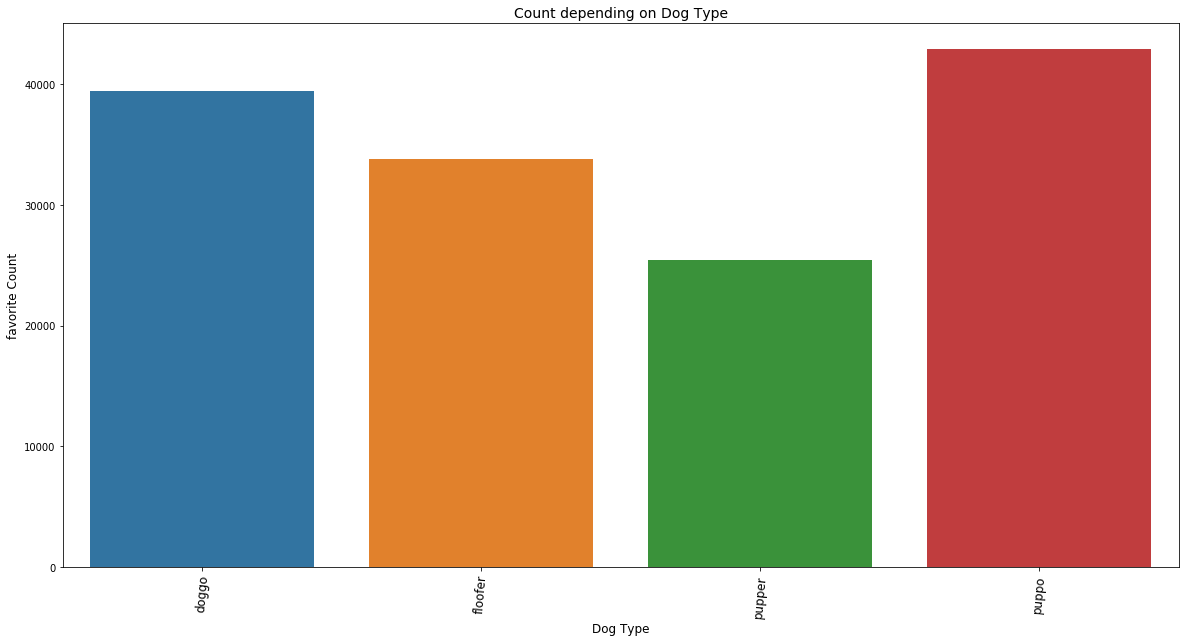

In [61]:
plt.figure(figsize=(20,10))

ax=sns.barplot(x=fav_df["dog_stage"], y=master_df["favorite_count"])
plt.ylabel('favorite Count',fontsize=12)
plt.xlabel('Dog Type',fontsize=12)
plt.title('Count depending on Dog Type',fontsize=14)
plt.xticks(rotation=85,fontsize=12);
plt.savefig('Count vs Dog Type')


In [62]:
source=master_df["extracted_source"].value_counts()

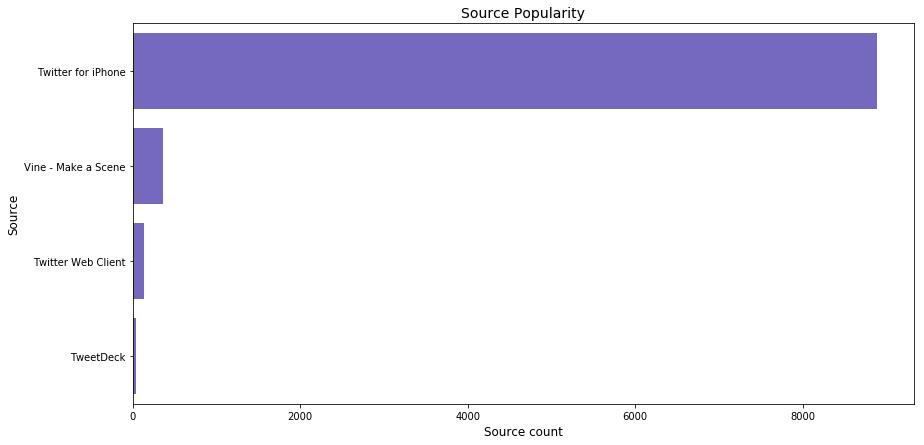

In [63]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=source.index, x= source,color='slateblue')
plt.xlabel('Source count',fontsize=12)
plt.ylabel('Source',fontsize=12)
plt.title('Source Popularity',fontsize=14)
plt.savefig('Source Count.png')

### Insight 3

In [64]:
#creating a new column for month 
master_df['timestamp']=pd.to_datetime(master_df['timestamp'])

In [65]:
#extracting just the months
months=[dates.strftime('%B') for dates in master_df['timestamp']]

In [66]:
master_df['month']=months

In [67]:
master_df.head()

,tweet_id,rating_numerator_x,rating_denominator_x,dog_stage,favorite_count,retweet_count,timestamp,text,dog_type,extracted_source,month
0,892420643555336193,13,10,doggo,39467.0,8853.0,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,,Twitter for iPhone,August
1,892177421306343426,13,10,doggo,33819.0,6514.0,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,,Twitter for iPhone,August
2,891815181378084864,12,10,doggo,25461.0,4328.0,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,,Twitter for iPhone,July
3,891689557279858688,13,10,doggo,42908.0,8964.0,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,,Twitter for iPhone,July
4,891327558926688256,12,10,doggo,41048.0,9774.0,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,,Twitter for iPhone,July


In [70]:
month_df=master_df.groupby('month',as_index=False)[['dog_stage','favorite_count','retweet_count']].mean()

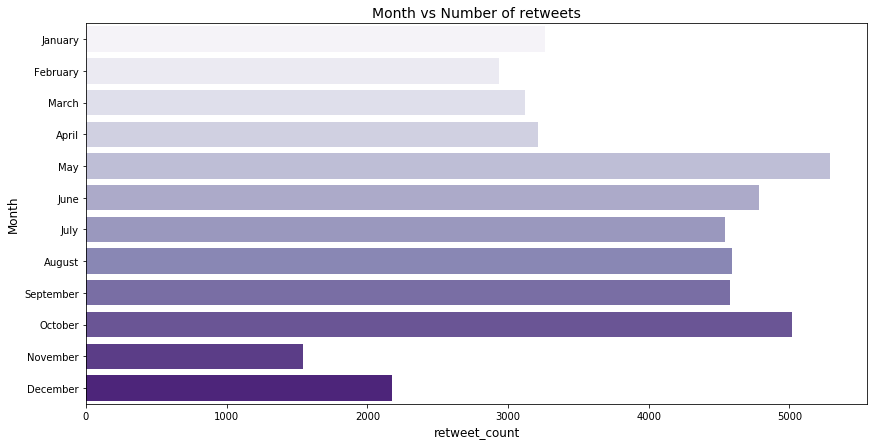

In [71]:
plt.figure(figsize=(14,7))
ax=sns.barplot(y=month_df['month'], x=month_df['retweet_count'],palette='Purples',
              order=['January','February','March','April','May','June','July','August','September',
                    'October','November','December'])
plt.ylabel('Month',fontsize=12)
plt.xlabel('retweet_count',fontsize=12)
plt.title('Month vs Number of retweets',fontsize=14)
plt.savefig('Month vs retweets.png')

### Insights:
1.Puppo followed by doggo have the most favorite count

2.May and october have the most retweet counts,

3.Twitter for iphone, tweets from a phone are the sources of most tweets